<a href="https://colab.research.google.com/github/ayda76/DeepLearningPytorch/blob/main/Food%20Recognition/FoodRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import torch
from torch import nn



In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#food101 101 different food categories

In [4]:
import requests
import zipfile
from pathlib import Path

#setup path to data folder
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

# if image folder does not exist download it and prepare it

if image_path.is_dir():
  print(f"{image_path} directory already exists. skipping download")

else:
  print(f"{image_path} does not exist. creating one!!")
  image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi does not exist. creating one!!


In [5]:
#get the data
#download it
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request= requests.get("http://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)
#unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping")
  zip_ref.extractall(image_path)


unzipping


In [6]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames , filenames in os.walk(dir_path):

    print(f" there are { len(dirnames)} directories and {len(filenames)} images in {dirpath} ")
  

In [7]:
walk_through_dir(image_path)

 there are 2 directories and 0 images in data/pizza_steak_sushi 
 there are 3 directories and 0 images in data/pizza_steak_sushi/test 
 there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
 there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
 there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
 there are 3 directories and 0 images in data/pizza_steak_sushi/train 
 there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
 there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
 there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 


In [8]:
# set up paths 
train_dir= image_path / "train"
test_dir= image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [9]:
# visualize image

import random 
from PIL import Image

random.seed(42)
# glob iterates and gives all files
# get all the image paths
image_path_list= list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sus

data/pizza_steak_sushi/test/pizza/714866.jpg
pizza
image height: 512
image width: 512


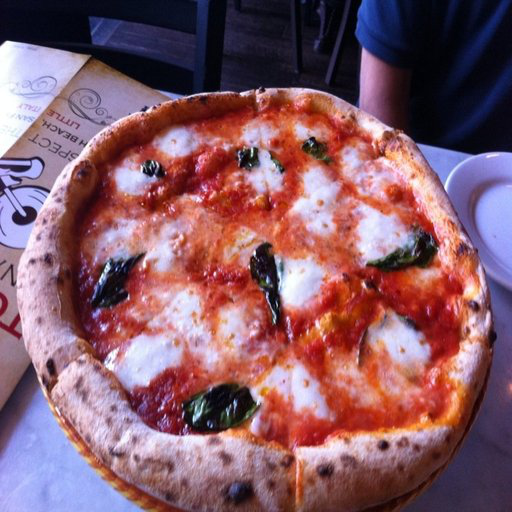

In [10]:
#pick random image path
random_image_path=random.choice(image_path_list)
print(random_image_path)

# get image class from path name (stem is end of folder like pizza)
image_class= random_image_path.parent.stem
print(image_class)

# open img

img=Image.open(random_image_path)

print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

Text(0.5, 1.0, 'image class: pizza , image shape:(512, 512, 3) -> [height, width, color_channels]')

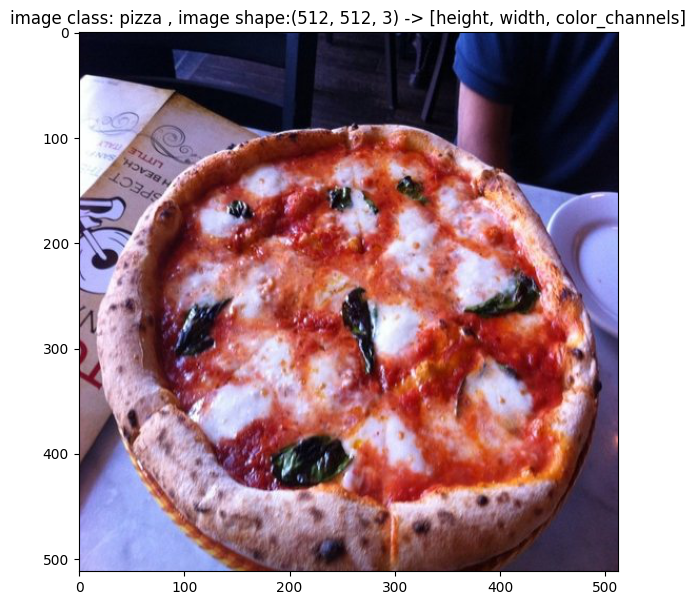

In [11]:
import matplotlib.pyplot as plt

#Turn the img to an array
img_as_array=np.asarray(img)

#plot the image
plt.figure(figsize=(7,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} , image shape:{img_as_array.shape} -> [height, width, color_channels]")

In [12]:
#transforming data --> tensor

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
data_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # 50 % of the time the image gets fliped in horizontal axis
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.0549, 0.0549, 0.0235,  ..., 0.0353, 0.0392, 0.0431],
         [0.0392, 0.0667, 0.0314,  ..., 0.0235, 0.0275, 0.0353],
         [0.0314, 0.0471, 0.0588,  ..., 0.0235, 0.0275, 0.0392],
         ...,
         [0.2275, 0.2314, 0.2392,  ..., 0.6902, 0.6902, 0.6824],
         [0.2392, 0.2392, 0.2431,  ..., 0.6902, 0.7059, 0.6980],
         [0.2314, 0.2392, 0.2510,  ..., 0.6980, 0.7137, 0.6941]],

        [[0.0941, 0.0863, 0.0353,  ..., 0.0392, 0.0431, 0.0353],
         [0.0588, 0.1059, 0.0549,  ..., 0.0314, 0.0314, 0.0314],
         [0.0353, 0.0824, 0.1020,  ..., 0.0314, 0.0353, 0.0314],
         ...,
         [0.1686, 0.1725, 0.1804,  ..., 0.7176, 0.7059, 0.6824],
         [0.1647, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6902],
         [0.1608, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6863]],

        [[0.2706, 0.2588, 0.1020,  ..., 0.1059, 0.1098, 0.1098],
         [0.1647, 0.3098, 0.1765,  ..., 0.1020, 0.1020, 0.1020],
         [0.0941, 0.2510, 0.2980,  ..., 0.0941, 0.0941, 0.

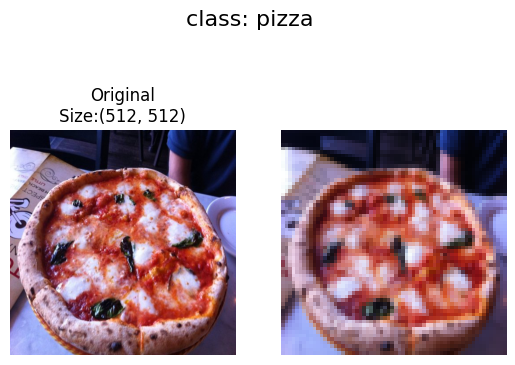

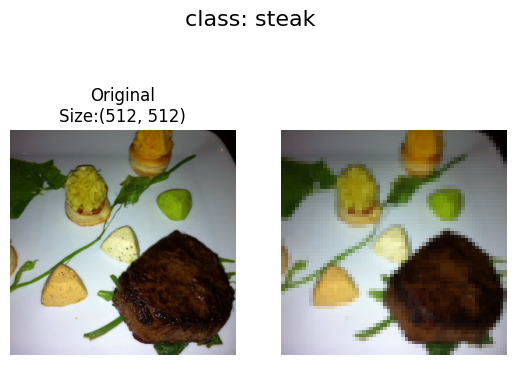

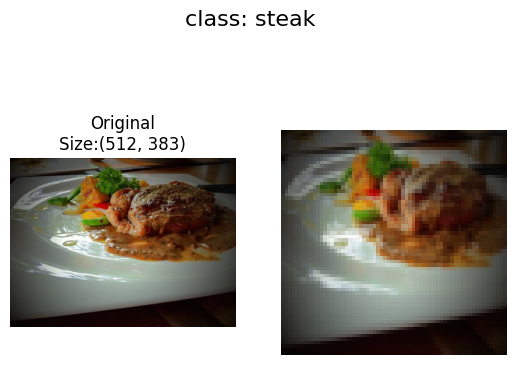

In [15]:
def plot_transformed_images(image_paths:list,transform, n=3, seed=None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig , ax= plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      #transform and plot 
      transformed_image=transform(f).permute(1,2,0)# c,h,w --> h, w, c
      ax[1].imshow(transformed_image)
      ax[1].axis("off")

      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [16]:
from torchvision import datasets

### use imagefolder to create datasets
train_data =datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
class_names=train_data.classes

In [18]:
class_names

['pizza', 'steak', 'sushi']

In [19]:
class_dict =train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
len(train_data), len(test_data)

(225, 75)

In [21]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [22]:
img, label= train_data[0][0] , train_data[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [23]:
label

0

In [24]:
class_names[label]

'pizza'

In [25]:
type(label)

int

original shape: torch.Size([3, 64, 64]) c, h, w
Image permute: torch.Size([64, 64, 3]) h, w, c


Text(0.5, 1.0, 'pizza')

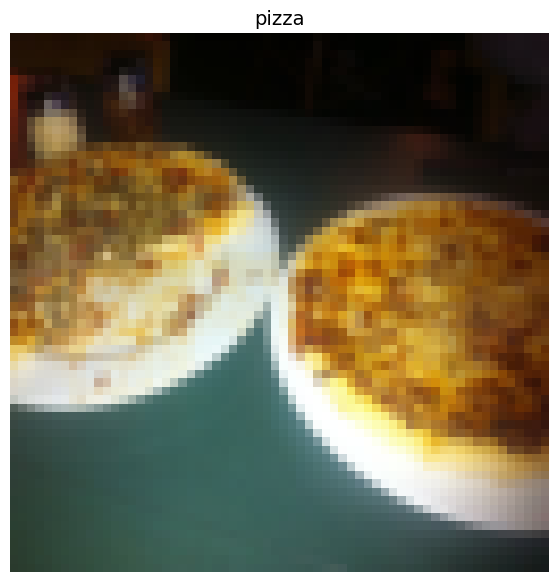

In [26]:
# rearrange the order dimensions

img_permute=img.permute(1,2,0)

print(f"original shape: {img.shape} c, h, w")
print(f"Image permute: {img_permute.shape} h, w, c")

##plot the image

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [27]:
train_dataloader= DataLoader(
    dataset=train_data,
    batch_size=1,
    num_workers=os.cpu_count(),
    shuffle=True   
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=1,
    num_workers=os.cpu_count(),
    shuffle=False
)

In [28]:
len(train_dataloader)

225

In [29]:
img, label= next(iter(train_dataloader))

print(f"image shape:{ img.shape}-> batch, c,h, w")
print(f"label shape:{label.shape}")

image shape:torch.Size([1, 3, 64, 64])-> batch, c,h, w
label shape:torch.Size([1])


In [30]:
# how to replicate imagefolder function
import os
import pathlib

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [31]:
# Instance of torch vision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [32]:
target_directory=train_dir
target_directory

PosixPath('data/pizza_steak_sushi/train')

In [33]:
print(f"target dir: {target_directory}")

target dir: data/pizza_steak_sushi/train


In [34]:
class_names_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [35]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  #find the class folder names in a target dictionary
  #1 get the class names by scanning the target directory
  classes= sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2 Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"could not find any classes in {directory}...")

  #3 create a dictionary of index labels(numbers are preferred)
  class_to_idx={class_name:i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [36]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [37]:
# write a custom dataset class

from torch.utils.data import Dataset
#subclass
class ImageFolderCustom(Dataset):
  #initialize our custom dataset
  def __init__(self, targ_dir:str, transform:None):
    #create class attributes
    self.paths= list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #transforms
    self.transform=transform
    #create classes and class to idx
    self.classes, self.class_to_idx= find_classes(targ_dir)

  #create a function to load images
  def load_image(self, index:int) -> Image.Image:
    # opens an image via path and returns it
    image_path=self.paths[index]
    return Image.open(image_path)

  #overwrite len
  def __len__(self) ->int:
    #returns the total number of samples
    return len(self.paths)

  #overwrite get item method
  def __getitem__(self, index:int) -> Tuple[torch.Tensor,int]:
    #returns one sample of data, data and label (x,y)
    img = self.load_image(index)
    class_name= self.paths[index].parent.name
    class_idx= self.class_to_idx[class_name]
    #transform if  necessary
    if self.transform:
      return self.transform(img), class_idx

    else: 
      return img, class_idx








In [38]:
#create a transform
train_transforms= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [39]:
#test out image folder custom
train_data_custom= ImageFolderCustom(targ_dir=train_dir,
                                     transform=train_transforms
                                     )
test_data_custom= ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)

In [40]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7f336f88add0>,
 <__main__.ImageFolderCustom at 0x7f336f88b8b0>)

In [41]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [42]:
print(train_data_custom.classes== train_data.classes)
print(test_data_custom.classes== test_data.classes)

True
True


In [43]:
#create a function to display random images

def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n: int =10,
                          display_shape:bool =True,
                          seed:int=None):
  #adjust display if n is too high
  if n >10:
    n=10
    display_shape=False
    print(f"for display purposes, n should not be larger than 10, setting to 10 and removing shape display")


  #set seed
  if seed:
    random.seed(seed)

  #get random sample indexes
  random_samples_idx=random.sample(range(len(dataset)),k=n)

  #plot 
  plt.figure(figsize=(16,8))


  # loop through random indexes 
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image , targ_label=dataset[targ_sample][0], dataset[targ_sample][1]
    #adjust tensor dimensions for plotting
    targ_Image_adjust=targ_image.permute(1,2,0) # c,h,w-> h,w,c

    # plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_Image_adjust)
    plt.axis("off")
    if classes:
      title= f"Class: {classes[targ_label]}"

      if display_shape:
        title= title+f"\nshape:{targ_Image_adjust.shape}"

    plt.title(title)

  



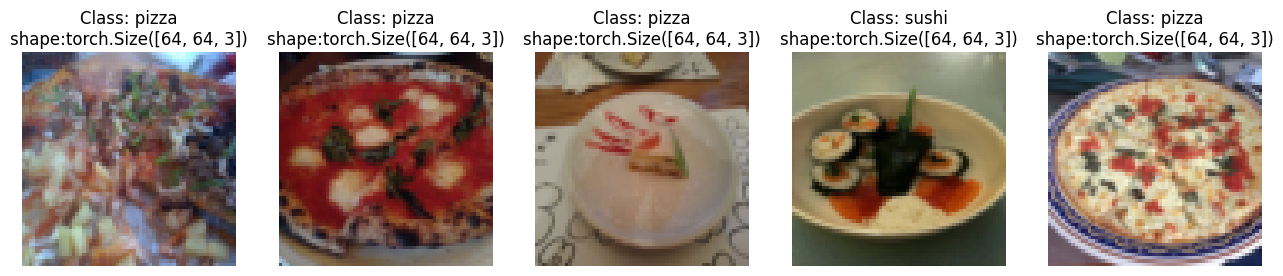

In [44]:
#display random images form the imagefolder 
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

for display purposes, n should not be larger than 10, setting to 10 and removing shape display


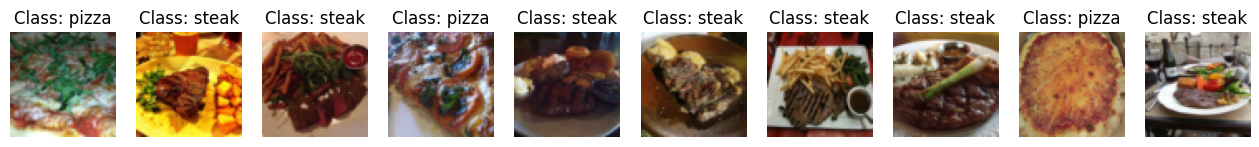

In [45]:
# display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=42)

In [46]:
train_dataloader_custom=DataLoader(
    dataset=train_data_custom,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count())

test_dataloader_custom= DataLoader(
    dataset=test_data_custom,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count())

In [47]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f336ed8a440>,
 <torch.utils.data.dataloader.DataLoader at 0x7f336ed89e40>)

In [48]:
img_custom, label_custom= next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [49]:
#other forms of transformation
from torchvision import transforms

train_transform= transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),#0-31 how intence you want the augmentation to happen
    transforms.ToTensor()
])
test_transform= transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])


In [50]:
image_path_list= list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg')]

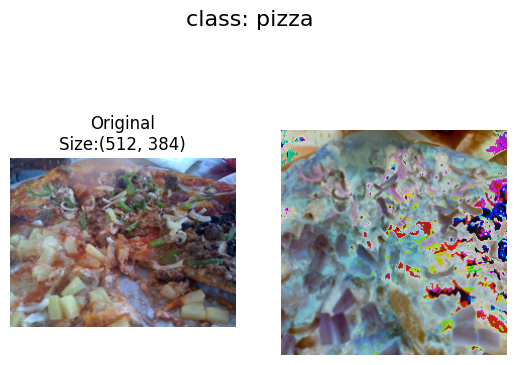

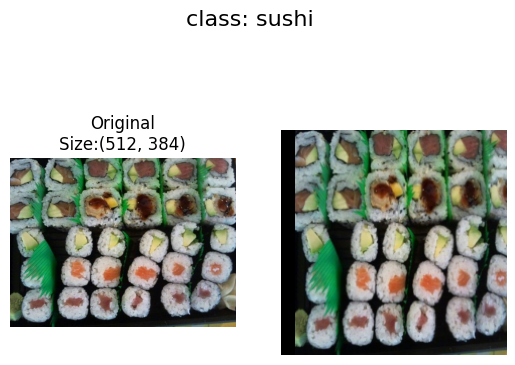

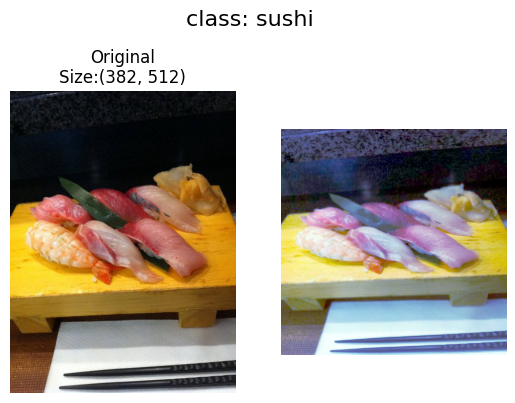

In [51]:
#plot random transformed images

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [52]:
#model Tiny VGG ....

simple_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),## shape according to sizes in Tiny VGG
    transforms.ToTensor()
])

### use imagefolder to create datasets
simple_train_data =datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform,
                                        target_transform=None
                                        
                                )
simple_test_data=datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform,
                                      target_transform=None)
#turn datasets to dataloaders
NumWokers=os.cpu_count()

simple_train_dataloader=DataLoader(dataset=simple_train_data,
                                   batch_size=1,
                                   shuffle=True,
                                   num_workers=NumWokers)
simple_test_dataloader=DataLoader(dataset=simple_test_data,
                                  batch_size=1,
                                  shuffle=False,
                                  num_workers=NumWokers)

In [53]:
#model Tiny VGG

class FoodRecognition (nn.Module):
  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=(3,3), stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #default stride value is same as the kernel_size
    )

    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3),stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape, bias=True)
    )

  
  def forward(self,x):
    x=self.conv_block1(x)
    #print(x.shape)
    x=self.conv_block2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x



In [54]:
#model Tiny VGG 
# with one more layer -> results were worse than before
"""
class FoodRecognition (nn.Module):
  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=(3,3), stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #default stride value is same as the kernel_size
    )

    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3),stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )

    self.conv_block3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=(3,3), stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #default stride value is same as the kernel_size
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4, out_features=output_shape, bias=True)
    )

  
  def forward(self,x):
    x=self.conv_block1(x)
    #print(x.shape)
    x=self.conv_block2(x)
    #print(x.shape)
    x=self.conv_block3(x)
    #print(x.shape)
    x=self.classifier(x)
    return x

"""

'\nclass FoodRecognition (nn.Module):\n  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):\n    super().__init__()\n    self.conv_block1=nn.Sequential(\n        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=0),\n        nn.ReLU(),\n        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=(3,3), stride=1,padding=0),\n        nn.ReLU(),\n        nn.MaxPool2d(kernel_size=2, stride=2) #default stride value is same as the kernel_size\n    )\n\n    self.conv_block2=nn.Sequential(\n        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3),stride=1, padding=0),\n        nn.ReLU(),\n        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=0),\n        nn.ReLU(),\n        nn.MaxPool2d(kernel_size=2, stride=2)\n\n    )\n\n    self.conv_block3=nn.Sequential(\n        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units

In [55]:
torch.manual_seed(42)
model0=FoodRecognition(input_shape=3,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
model0

FoodRecognition(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [56]:
#get a single image batch
image_batch, label_batch= next(iter(simple_train_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [57]:
model0(image_batch.to(device))  # RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 10x3)
"""
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13]) 13*13=1690
"""

'\ntorch.Size([32, 10, 30, 30])\ntorch.Size([32, 10, 13, 13]) 13*13=1690\n'

In [58]:
#get summary

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from torchinfo import summary

summary(model0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
FoodRecognition                          [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [60]:
#train and test functions

def train_fun(dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn,
              model:torch.nn.Module,
              optimizer:torch.optim,
              accuracy,
              device):
  model.train()

  train_loss,train_acc=0,0
  for batch, (x,y) in enumerate(dataloader):

    x,y=x.to(device),y.to(device)

    y_pred=model(x)

    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    acc=accuracy(torch.argmax(torch.softmax(y_pred, dim=1),dim=1), y)
    train_acc+=acc.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss= train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)

 
  return train_loss, train_acc







In [61]:
#test function

def test_fun(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn,
             accuracy,
             device):
  test_loss,test_acc=0,0
  
  model.eval()
  with torch.inference_mode():
    
    for batch, (x,y) in enumerate(dataloader):

      x,y= x.to(device) , y.to(device)

      y_pred=model(x)

      loss=loss_fn(y_pred,y)
      test_loss+=loss.item()
      acc= accuracy(torch.argmax(torch.softmax(y_pred,dim=1), dim=1), y)
      test_acc+= acc.item()
    

  test_loss= test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)

  
  return test_loss, test_acc




In [62]:
#functionize the looping through train and test steps
from tqdm.auto import tqdm
def train_test(model:torch.nn.Module,
               train_dataloader:torch.utils.data.DataLoader,
               test_dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn,
               optimizer:torch.optim,
               accuracy,
               device, 
               epochs):
  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]}
  
  for epoch in range(epochs):
    
    train_loss,train_acc=train_fun(dataloader=train_dataloader,loss_fn=loss_fn,model=model,optimizer=optimizer,accuracy=accuracy,device=device)
             
              
              
              
              
    
    test_loss,test_acc=test_fun(model=model,dataloader=test_dataloader,loss_fn=loss_fn,accuracy=accuracy,device=device)


    #print
    print(f"epoch:{epoch} , Train_loss: {train_loss}, Train_accuracy: {train_acc},Test_loss: {test_loss}, Test_accuracy: {test_acc},")        
             
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results
             

In [63]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device= "cuda" if torch.cuda.is_available() else "cpu"

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model0.parameters(), lr=0.001)



In [64]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.8 MB/s eta 0:00:00


In [65]:
import torchmetrics
from torchmetrics import Accuracy
accuracy=Accuracy(task="multiclass", num_classes=3).to(device)

In [66]:
from timeit import default_timer as timer
start_time=timer()

model0_results= train_test(model=model0,
                           train_dataloader=simple_train_dataloader,
                           test_dataloader=simple_test_dataloader,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy=accuracy,
                           device=device,
                           epochs=5)

end_time=timer()
print(f"train time: {end_time- start_time:.3f} seconds")

epoch:0 , Train_loss: 1.1058285744984944, Train_accuracy: 0.3466666666666667,Test_loss: 1.089423975944519, Test_accuracy: 0.4,
epoch:1 , Train_loss: 1.0297189411189822, Train_accuracy: 0.4888888888888889,Test_loss: 1.0912457954883577, Test_accuracy: 0.4266666666666667,
epoch:2 , Train_loss: 0.9518610333061467, Train_accuracy: 0.5777777777777777,Test_loss: 0.9873767777283986, Test_accuracy: 0.44,
epoch:3 , Train_loss: 0.9264272791768113, Train_accuracy: 0.5688888888888889,Test_loss: 1.0230925497412682, Test_accuracy: 0.4266666666666667,
epoch:4 , Train_loss: 0.8903083724942472, Train_accuracy: 0.6044444444444445,Test_loss: 1.0081405721108119, Test_accuracy: 0.49333333333333335,
train time: 14.797 seconds


In [67]:
model0_results


{'train_loss': [1.1058285744984944,
  1.0297189411189822,
  0.9518610333061467,
  0.9264272791768113,
  0.8903083724942472],
 'train_acc': [0.3466666666666667,
  0.4888888888888889,
  0.5777777777777777,
  0.5688888888888889,
  0.6044444444444445],
 'test_loss': [1.089423975944519,
  1.0912457954883577,
  0.9873767777283986,
  1.0230925497412682,
  1.0081405721108119],
 'test_acc': [0.4,
  0.4266666666666667,
  0.44,
  0.4266666666666667,
  0.49333333333333335]}

In [68]:
model0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [69]:
def plot_loss_curves(results:Dict[str, List[float]]):
  #plot training curves of a results dictionary
  #get the loss values of teh results dictionary(train, test)

  loss=results["train_loss"]
  test_loss =results["test_loss"]

  #get the accuracy of the results dictionary
  accuracy=results["train_acc"]
  test_accuracy=results["test_acc"]

  #figure out how many epochs there were 
  epochs= range(len(results["train_loss"]))

  # set up plot
  plt.figure(figsize=(7,7))
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot the accuracy
  """
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  """

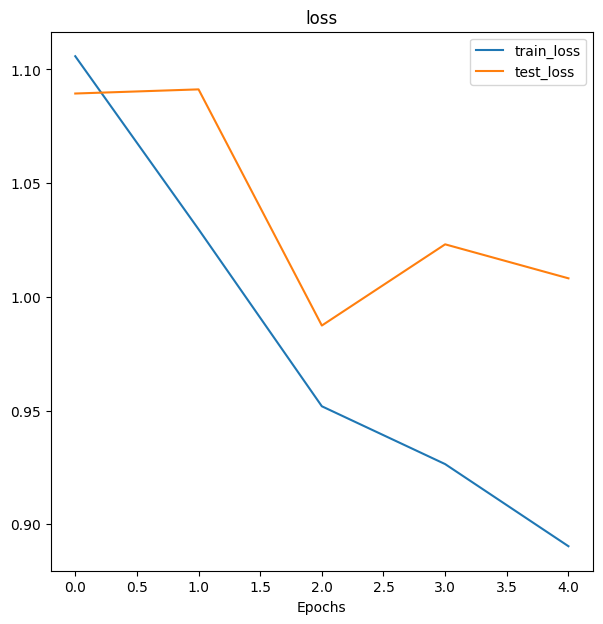

In [70]:
plot_loss_curves(model0_results)

In [71]:
#according to my loss plot model is overfitting

from torchvision import transforms
train_transform_trivial=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.RandomRotation(20),                # Random rotation between -20 and +20 degrees
    transforms.RandomHorizontalFlip(),           # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(),             # Randomly flip the image vertically
    transforms.RandomResizedCrop(64),           # Randomly crop and resize the image to size 224x224
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


test_transform_simple=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomRotation(20),                # Random rotation between -20 and +20 degrees
    transforms.RandomHorizontalFlip(),           # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(),             # Randomly flip the image vertically
    transforms.RandomResizedCrop(64),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [72]:
#create train, test datasets and dataloader

train_data_augmented=datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)
test_data_simple= datasets.ImageFolder(root=test_dir,
                                       transform=test_transform_simple)

In [73]:
import os
batch=32
num_workers=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented=DataLoader(dataset=train_data_augmented,
                                      batch_size=batch,
                                      num_workers=num_workers,
                                      shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=batch,
                                  num_workers=num_workers,
                                  shuffle=False)

In [74]:
torch.manual_seed(42)
model1=FoodRecognition(input_shape=3,
                       hidden_units=10,
                       output_shape=len(train_data_augmented.classes)).to(device)

model1

FoodRecognition(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=5

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model1.parameters(), lr=0.001)
accuracy=Accuracy(task="multiclass", num_classes=3).to(device)

from timeit import default_timer as timer
start_time =timer()

#train_test step

model1_results=train_test(model=model1,
                          train_dataloader=train_dataloader_augmented,
                          test_dataloader=test_dataloader_simple,
                          loss_fn=loss_fn,
                          optimizer=optimizer,
                          accuracy=accuracy,
                          epochs=epochs,
                          device=device)
end_time=timer()
print(f"total training time for model{end_time - start_time:.3f} sec")

epoch:0 , Train_loss: 1.1209103018045425, Train_accuracy: 0.25,Test_loss: 1.106446623802185, Test_accuracy: 0.21875,
epoch:1 , Train_loss: 1.0789648741483688, Train_accuracy: 0.41796875,Test_loss: 1.1241834958394368, Test_accuracy: 0.2604166666666667,
epoch:2 , Train_loss: 1.0705433636903763, Train_accuracy: 0.42578125,Test_loss: 1.1422551075617473, Test_accuracy: 0.2604166666666667,
epoch:3 , Train_loss: 1.1174832433462143, Train_accuracy: 0.3046875,Test_loss: 1.1363921960194905, Test_accuracy: 0.2708333333333333,
epoch:4 , Train_loss: 1.0695784091949463, Train_accuracy: 0.5,Test_loss: 1.1419503291447957, Test_accuracy: 0.3020833333333333,
total training time for model12.555 sec


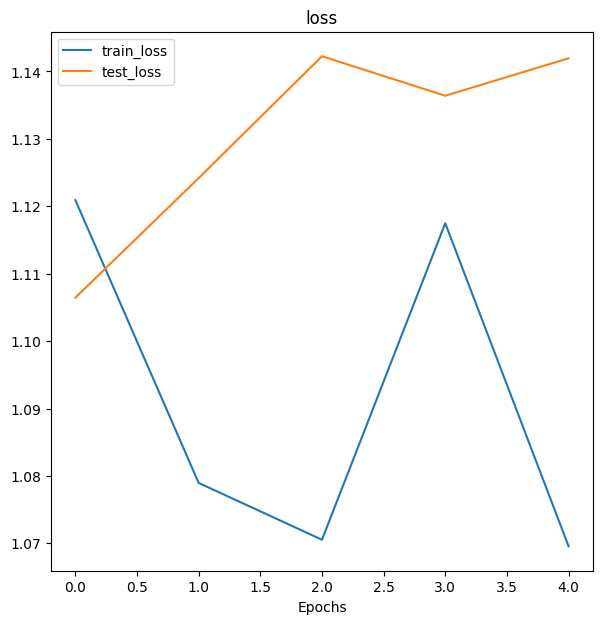

In [76]:
plot_loss_curves(model1_results)

In [77]:
#it is both overfitting and underfitting

model0_df=pd.DataFrame(model0_results)
model1_df=pd.DataFrame(model1_results)
model0

FoodRecognition(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

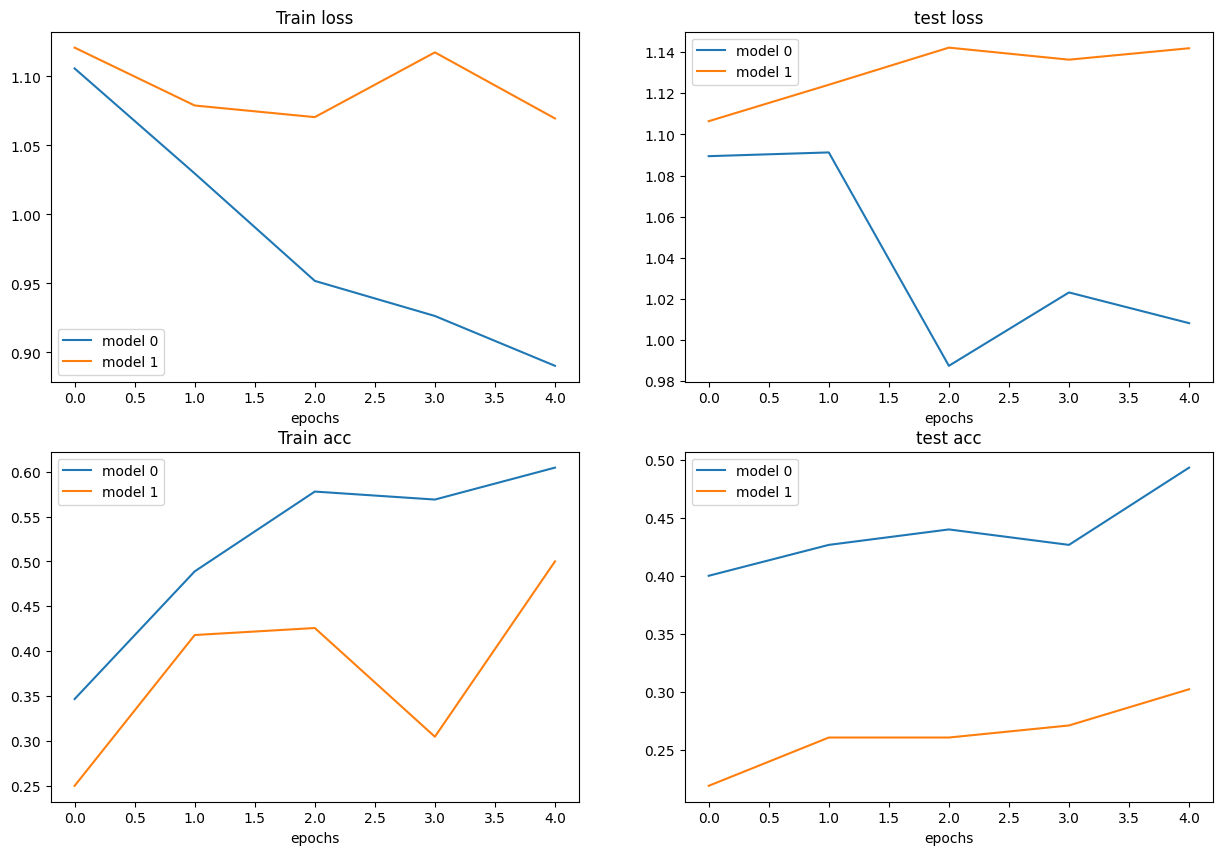

In [78]:
plt.figure(figsize=(15,10))

epochs=range(len(model0_df))

plt.subplot(2,2,1)
plt.plot(epochs,model0_df["train_loss"], label="model 0")
plt.plot(epochs, model1_df["train_loss"], label="model 1")
plt.title("Train loss")
plt.xlabel("epochs")
plt.legend()


plt.subplot(2,2,2)
plt.plot(epochs,model0_df["test_loss"], label="model 0")
plt.plot(epochs, model1_df["test_loss"], label="model 1")
plt.title("test loss")
plt.xlabel("epochs")
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs,model0_df["train_acc"], label="model 0")
plt.plot(epochs, model1_df["train_acc"], label="model 1")
plt.title("Train acc")
plt.xlabel("epochs")
plt.legend()


plt.subplot(2,2,4)
plt.plot(epochs,model0_df["test_acc"], label="model 0")
plt.plot(epochs, model1_df["test_acc"], label="model 1")
plt.title("test acc")
plt.xlabel("epochs")
plt.legend()

In [79]:
import requests

custom_image_path=data_path/ "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path} ...")
    f.write(request.content)

else:
  print("it already exists")

In [80]:
import torchvision

custom_image_uint8=torchvision.io.read_image(str(custom_image_path)) # io stands for input and output
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

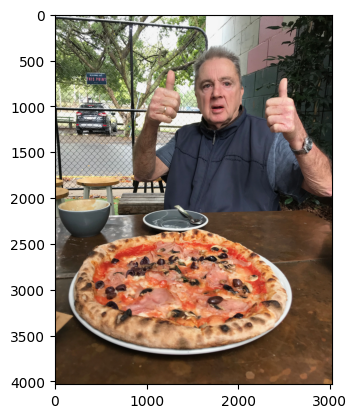

In [81]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [82]:
custom_image_uint8.shape

torch.Size([3, 4032, 3024])

In [85]:
#making a prediction on custom data
model1.eval()
with torch.inference_mode():
  model1(custom_image_uint8.to(device))

RuntimeError: ignored

In [86]:
#load in the custom image and convert to torch.float32 and scale them[0-255]
custom_image= torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image.shape

torch.Size([3, 4032, 3024])

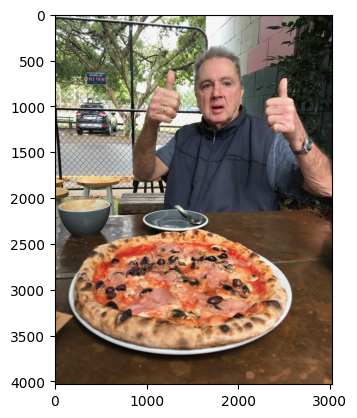

In [87]:
plt.imshow(custom_image.permute(1,2,0))

In [88]:
#create transform pipline to resize the image
custom_image_transform= transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed=custom_image_transform(custom_image)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [89]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

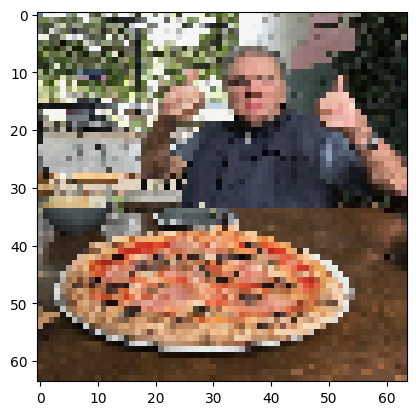

In [90]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [91]:
#add batchsize

model1.eval()
with torch.inference_mode():
  custom_image_pred=model1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.2163, -0.1703, -0.1859]], device='cuda:0')

In [92]:
#convert logits to prediction probibilities
custom_image_pred_probs=torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.4259, 0.2893, 0.2848]], device='cuda:0')

In [93]:
#convert the probabbilities to labels
custom_image_pred_labels=torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [94]:
class_names[custom_image_pred_labels]

'pizza'

In [95]:
#prediction function
def pred_plot_image(model:torch.nn,image_path:str,class_names:List[str],transform,device):

  target_image= torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image=target_image/ 255

  if transform:
    target_image=transform(target_image)
    

  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image=target_image.unsqueeze(0)
    target_image_pred=model(target_image.to(device))

  target_image_pred_probs=torch.softmax(target_image_pred,dim=1)
  target_image_pred_labels=torch.argmax(target_image_pred_probs,dim=1)


  #plot
  #argmax returns the max x of F(x) which results in max F(x)
  #max returns  max of F(x)

  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title=f"pred:{class_names[target_image_pred_labels.cpu()]} , prob: {target_image_pred_probs.max().cpu():.3f}"

  else:
    title=f"pred:{class_names[target_image_pred_labels.cpu()]} , prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)





    
    
    
    
    




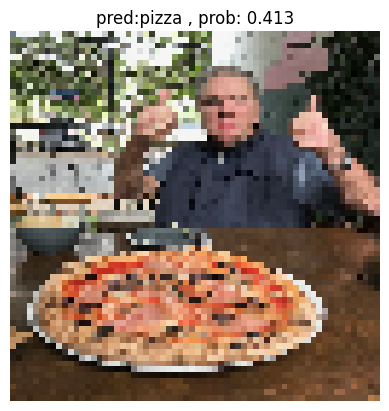

In [96]:
pred_plot_image(model=model0,
                image_path=custom_image_path,
                class_names=class_names,
                transform=custom_image_transform,
                device=device)

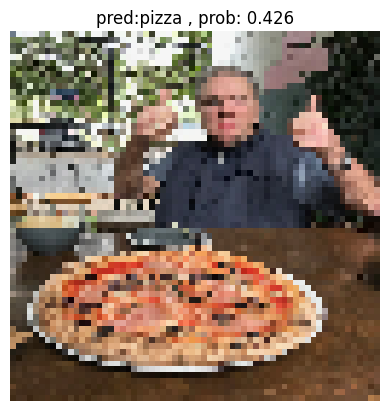

In [97]:
pred_plot_image(model=model1,
                image_path=custom_image_path,
                class_names=class_names,
                transform=custom_image_transform,
                device=device)

In [98]:
#using pretrained model ResNet50 for my problem
from torchvision import models

resnet=models.resnet50(pretrained=True)
num_classes = 3 
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 211MB/s]


In [99]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=15

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=resnet.parameters(), lr=0.001)
#optimizer=torch.optim.SGD(params=resnet.parameters(),lr=0.1)
accuracy=Accuracy(task="multiclass", num_classes=3).to(device)
"""
regulization did not work for this problem
reg_lambda = 0.01

# Define your loss function
criterion = nn.CrossEntropyLoss()

# Define your regularization function (L2 regularization)
regularization_loss = 0
for param in resnet.parameters():
    regularization_loss += torch.norm(param, 2)

# Define the combined loss function
def loss_fn(output, target):
    return criterion(output, target) + reg_lambda * regularization_loss

# Define your optimizer
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.01, momentum=0.9)
"""

from timeit import default_timer as timer
start_time =timer()

#train_test step

resnet_results=train_test(model=resnet.to(device),
                          train_dataloader=train_dataloader_augmented,
                          test_dataloader=test_dataloader_simple,
                          loss_fn=loss_fn,
                          optimizer=optimizer,
                          accuracy=accuracy,
                          epochs=epochs,
                          device=device)
end_time=timer()
print(f"total training time for model{end_time - start_time:.3f} sec")

epoch:0 , Train_loss: 1.3930644989013672, Train_accuracy: 0.4609375,Test_loss: 7.133884827295939, Test_accuracy: 0.31060606241226196,
epoch:1 , Train_loss: 1.3715484030544758, Train_accuracy: 0.46875,Test_loss: 77.01334883769353, Test_accuracy: 0.5625,
epoch:2 , Train_loss: 1.2305193394422531, Train_accuracy: 0.5234375,Test_loss: 13.234612226486206, Test_accuracy: 0.2708333333333333,
epoch:3 , Train_loss: 1.2265898659825325, Train_accuracy: 0.41796875,Test_loss: 476.609125773112, Test_accuracy: 0.28882576028505963,
epoch:4 , Train_loss: 1.3054123595356941, Train_accuracy: 0.4375,Test_loss: 72.53365874290466, Test_accuracy: 0.311553031206131,
epoch:5 , Train_loss: 1.2879602834582329, Train_accuracy: 0.52734375,Test_loss: 22.38832311828931, Test_accuracy: 0.6259469787279764,
epoch:6 , Train_loss: 0.862623106688261, Train_accuracy: 0.640625,Test_loss: 2.904543876647949, Test_accuracy: 0.4649621248245239,
epoch:7 , Train_loss: 1.1301202923059464, Train_accuracy: 0.53515625,Test_loss: 1.088

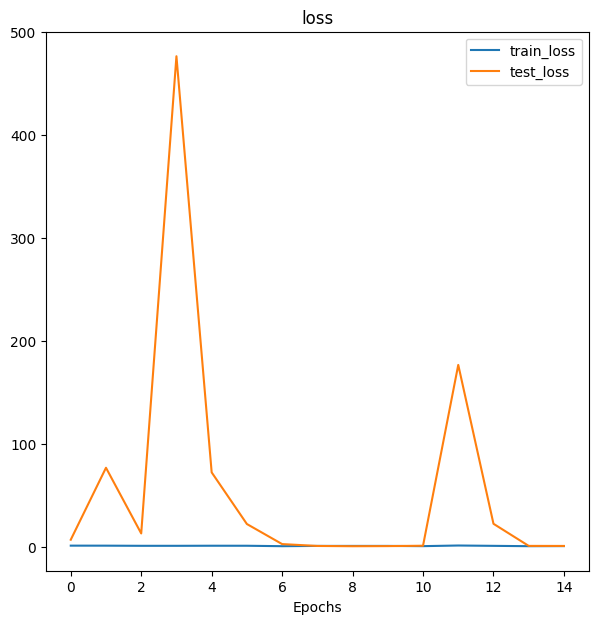

In [100]:
plot_loss_curves(resnet_results)

In [101]:
#transfer learning with torchvision.models.efficientnet_b0

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model_f = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 88.6MB/s]


In [102]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model_f, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [103]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_f.features.parameters():
    param.requires_grad = False

In [105]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape=len(class_names)
# Recreate the classifier layer and seed it to the target device
model_f.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [107]:
summary(model_f,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [109]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
torch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


In [110]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3815, done.
remote: Counting objects: 100% (458/458), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 3815 (delta 242), reused 400 (delta 196), pack-reused 3357
Receiving objects: 100% (3815/3815), 650.61 MiB | 26.73 MiB/s, done.
Resolving deltas: 100% (2198/2198), done.
Updating files: 100% (248/248), done.


In [111]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [112]:
# Create training and testing DataLoaders as well as get a list of class names

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f336c87b9a0>,
 ['pizza', 'steak', 'sushi'])

In [113]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [114]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [117]:
#train_test
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_f.parameters(),lr=0.001)
accuracy=Accuracy(task="multiclass", num_classes=3).to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 
start_time = timer()

model_f_results=train_test(model=model_f,
                           train_dataloader=train_dataloader,
                           test_dataloader=test_dataloader,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy=accuracy,
                           epochs=15,
                           device=device)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

epoch:0 , Train_loss: 0.4861188642680645, Train_accuracy: 0.94140625,Test_loss: 0.49951324860254925, Test_accuracy: 0.8967803120613098,
epoch:1 , Train_loss: 0.41897814348340034, Train_accuracy: 0.94921875,Test_loss: 0.4616033732891083, Test_accuracy: 0.8967803120613098,
epoch:2 , Train_loss: 0.410162128508091, Train_accuracy: 0.91796875,Test_loss: 0.45837365587552387, Test_accuracy: 0.8863636453946432,
epoch:3 , Train_loss: 0.43903906270861626, Train_accuracy: 0.8359375,Test_loss: 0.42100433508555096, Test_accuracy: 0.8967803120613098,
epoch:4 , Train_loss: 0.3975611701607704, Train_accuracy: 0.8359375,Test_loss: 0.43562349677085876, Test_accuracy: 0.9176136453946432,
epoch:5 , Train_loss: 0.4217144139111042, Train_accuracy: 0.83984375,Test_loss: 0.39545435706774396, Test_accuracy: 0.9176136453946432,
epoch:6 , Train_loss: 0.3663258720189333, Train_accuracy: 0.96484375,Test_loss: 0.38319794336954754, Test_accuracy: 0.9280303120613098,
epoch:7 , Train_loss: 0.4071867987513542, Train_ac

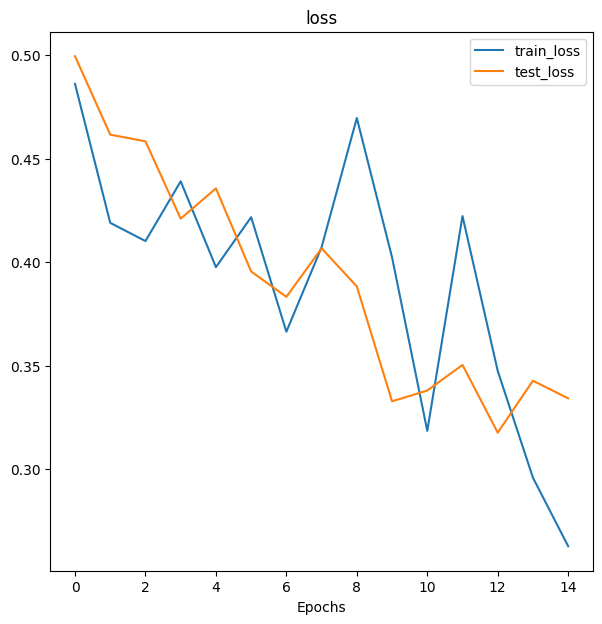

In [118]:
plot_loss_curves(model_f_results)